In [95]:
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple
from sklearn.linear_model import LinearRegression, LogisticRegression

In [431]:
delta_h     = 1.17  # cm.
eta_water   = 0.01  # Puaz
rho_water   = 1     # g / сm^3
g           = 980   # cm / s^2
R           = 0.05  # cm (диаметр капилляра)
l           = 13.7  # cm (длина капилляра)
sigm_V = 1          # cm^3
sigm_t = 1          # sec.
sigm_h = 0.05       # сm
sigm_R = 0.0005      # cm
sigm_l = 0.1        # cm

In [432]:
Experiment = namedtuple ("Experiment", "h time V")

In [433]:
Q = 20 / 222
(5.12 - delta_h) * rho_water * g * R**4 * np.pi / (8 * Q * l)  

0.007697779841395508

In [434]:
# each element is h (cм), t (с.), V (cm^3)
data = [Experiment(3.07, 709, 20),
        Experiment(7.05, 164, 20),
        Experiment(3.41, 434, 20),
        Experiment(4.73, 275, 20),
        Experiment(5.12, 222, 20),
        Experiment(4.0,  315, 20)]
        
data.sort (key = lambda exp: exp.h)

h_in_all_experiments =  list (map(lambda ex: ex.h,              data))
t_in_all_experiments =  list (map(lambda ex: ex,                data))
v_in_all_experiments =  list (map(lambda ex: ex.V,              data))
Q_in_all_experiments =  list (map(lambda ex: count_Q(ex),       data))

all_Q_sigmas = list (map(lambda ex: count_Q(ex) * (sigm_V / ex.V + sigm_t / ex.time),   data)) 

In [435]:
def get_delta_p (h):
    return (h  - delta_h) * rho_water * g

In [436]:
def count_rendols_number(experiment):
    return (experiment.V * rho_water) / (np.pi * R * eta_water * experiment.time)

In [437]:
def count_a (experiment):
    re_num = count_rendols_number (experiment)
    return 0.2 * R * re_num

In [438]:
def count_Q (experiment):
    return experiment.V / experiment.time

In [439]:
for exp in data:
    print (f"{exp.h}\t&\t{exp.time}\t&\t{exp.V}\t&\t{count_Q(exp):.4f}\t&\t{count_rendols_number (exp):.3f}\t&\t{count_a (exp):.3f}\t\\\\")

print ("\\hline")

3.07	&	709	&	20	&	0.0282	&	17.958	&	0.180	\\
3.41	&	434	&	20	&	0.0461	&	29.337	&	0.293	\\
4.0	&	315	&	20	&	0.0635	&	40.420	&	0.404	\\
4.73	&	275	&	20	&	0.0727	&	46.300	&	0.463	\\
5.12	&	222	&	20	&	0.0901	&	57.353	&	0.574	\\
7.05	&	164	&	20	&	0.1220	&	77.637	&	0.776	\\
\hline


In [440]:
from sklearn import linear_model
def plot_Q_h (plt):

    X_data = np.array(h_in_all_experiments).reshape(-1, 1)
    Y_data = np.array(Q_in_all_experiments)
    model = LinearRegression().fit (X_data, Y_data)

    X_data_for_plot = np.arange (0, X_data.max() + 1, 0.25)
    Y_data_for_plot = model.predict (X_data_for_plot.reshape(-1, 1))
    plt.plot (X_data_for_plot, Y_data_for_plot, linestyle="--", label="Аппроксимация зависимости Q(h)")
    plt.scatter (h_in_all_experiments, Q_in_all_experiments, marker = "+", color = "green", label="Экспериментальные данные")
    plt.errorbar(h_in_all_experiments, Q_in_all_experiments, xerr=sigm_h, yerr=all_Q_sigmas, fmt='none', color="green")

    return model.coef_, model.intercept_

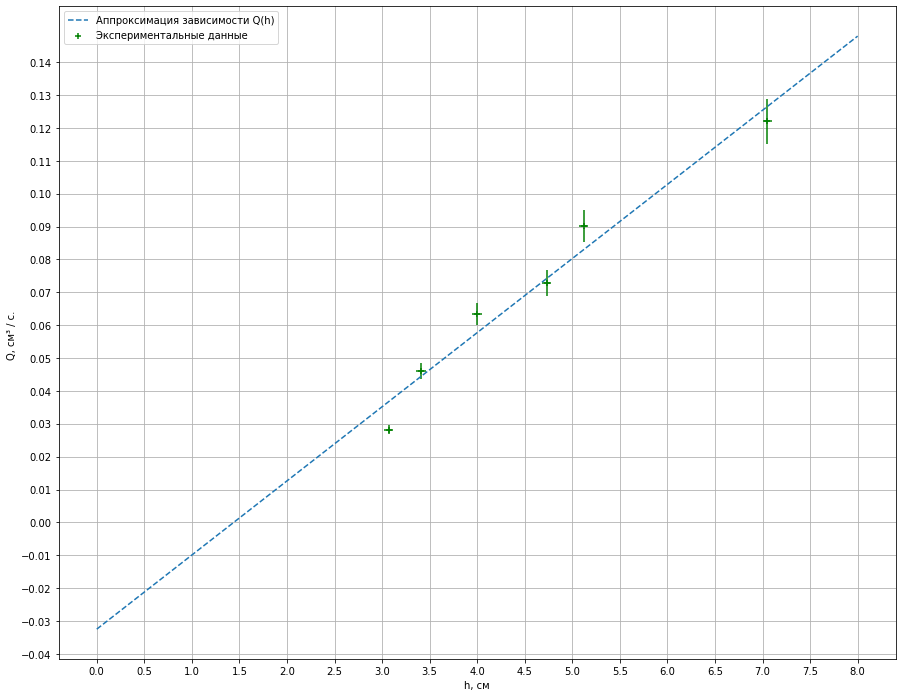

In [441]:
fig = plt.figure (figsize=(15, 12))
plt.xticks (np.arange (0, 8.6, 0.5))
plt.yticks (np.arange (-0.06, 0.150, 0.01))
plt.grid ()
plt.ylabel ("Q, см³ / с. ")
plt.xlabel ("h, см")
model_coef, model_intercept = plot_Q_h(plt)
plt.legend()
# plt.show()
plt.savefig("graph.png")

In [442]:
experimental_delta_h = (-model_intercept / model_coef)[0]

In [443]:
experimental_delta_h, experimental_delta_h - delta_h 

(1.4401323329160083, 0.27013233291600836)

In [444]:
def count_eta (line_coef):
    eta = (np.pi * R**4 * rho_water * g) / (8 * l * line_coef)
    sigm_eta = eta * np.sqrt ((sigm_h / np.mean (h_in_all_experiments))**2 + 16 * (sigm_R / R)**2 + (sigm_l / l)**2)
    return eta, sigm_eta

In [445]:
model_coef[0]

0.022549105857781578

In [446]:
count_eta (model_coef[0])

(0.007786030240393954, 0.0003278772183211855)